In [1]:
#importing libraries
import numpy as np
import pandas as pd 

In [2]:
#reading data
data = pd.read_excel (r'C:\Users\sudheryam kumar\Desktop\data1.xlsx')

In [3]:
#dispalying data
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [4]:
#displaying data
data.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age in years
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1,41
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0,56
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1,51
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,53
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,57
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,56


In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn.metrics import accuracy_score
from sklearn import tree

In [20]:
df = data.rename(columns={'cardio':'Decision'}, inplace=True)
df = data.drop(['height' , 'age' , 'weight' , 'ap_hi' , 'ap_lo' ,'age in years'], axis = 1) 
df.head()

,id,gender,cholesterol,gluc,smoke,alco,active,Decision
0,0,2,1,1,0,0,1,0
1,1,1,3,1,0,0,1,1
2,2,1,3,1,0,0,0,1
3,3,2,1,1,0,0,1,1
4,4,1,1,1,0,0,0,0


Here, 2 in gender is men and 1 is women

In cholesterol- 1 is normal, 2 is above normal, 3 is well above normal

In glucose - 1: normal, 2: above normal, 3: well above normal

in smoke and alcohol is whether person smokes/consume alcohol or not

Cardio is decision whether it will have cardiac problem or not

In [21]:
df.sum()

id             3498069393
gender              94470
cholesterol         95681
gluc                85852
smoke                6169
alco                 3764
active              56261
Decision            34979
dtype: int64

In [22]:
df.mean()

id             49972.419900
gender             1.349571
cholesterol        1.366871
gluc               1.226457
smoke              0.088129
alco               0.053771
active             0.803729
Decision           0.499700
dtype: float64

In [23]:
df.std()

id             28851.302323
gender             0.476838
cholesterol        0.680250
gluc               0.572270
smoke              0.283484
alco               0.225568
active             0.397179
Decision           0.500003
dtype: float64

In [24]:
df.describe()

,id,gender,cholesterol,gluc,smoke,alco,active,Decision
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349571,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,0.476838,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df['Decision'].value_counts()

0    35021
1    34979
Name: Decision, dtype: int64

In [26]:
df['Decision'].value_counts(normalize=True) * 100

0    50.03
1    49.97
Name: Decision, dtype: float64

In [27]:
#make histogram of 1. Decision of 0 and decision of 1 and compare both of them 

In [28]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
y= df['Decision'].values
x= df['cholesterol'].values

In [30]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
logreg.fit(x_train, y_train)
y_pred = logreg.preedict(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.metrics import roc_curve

In [33]:
from chefboost import Chefboost as chef
config = {'algorithm': 'CHAID'}
model = chef.fit(df, config)

Regression  tree is going to be built...
MAE:  0.4079285714285714
RMSE:  0.6386649020753036
Mean:  0.4997
MAE / Mean:  81.63469510277596 %
RMSE / Mean:  127.80966621478959 %
finished in  1114.4694967269897  seconds


In [34]:
#building decision rules
def findDecision(gender, cholesterol, gluc, smoke, alco, active, cardio):
    if gender == 1:
        if smoke == 0:
            return 1
        elif smoke == 1:
            return 0
        else:
            return 0
    elif gender == 2:
        if gluc == 1:
            return 0
        elif gluc == 1:
            return 1
        else:
            return 1

In [35]:
#Testing for custom instances
test_instance = [1, 2, 1, 0, 1, 1] 
model = chef.fit(df, config)
prediction = chef.predict(model, test_instance)

Regression  tree is going to be built...
MAE:  0.4079285714285714
RMSE:  0.6386649020753036
Mean:  0.4997
MAE / Mean:  81.63469510277596 %
RMSE / Mean:  127.80966621478959 %
finished in  559.8633198738098  seconds


In [36]:
moduleName = "outputs/rules/rules" #this will load outputs/rules/rules.py
tree = chef.restoreTree(moduleName)
prediction = tree.findDecision([1, 2, 1, 0, 1, 1])


In [37]:
model = chef.fit(df.copy(), config)
chef.save_model(model, "model.pkl")


Regression  tree is going to be built...
MAE:  0.4079285714285714
RMSE:  0.6386649020753036
Mean:  0.4997
MAE / Mean:  81.63469510277596 %
RMSE / Mean:  127.80966621478959 %
finished in  504.481778383255  seconds


In [38]:
config = {'algorithm': 'CHAID'}

In [39]:
if __name__ == '__main__':
   config = {'algorithm': 'CHAID', 'enableParallelism': True}
   model = chef.fit(df, config)


Regression  tree is going to be built...
MAE:  0.4079285714285714
RMSE:  0.6386649020753036
Mean:  0.4997
MAE / Mean:  81.63469510277596 %
RMSE / Mean:  127.80966621478959 %
finished in  643.1405487060547  seconds


In [40]:
if __name__ == '__main__':
   config = {'algorithm': 'CHAID', 'enableParallelism': True}
   model = chef.fit(df, config)
   fi = chef.feature_importance()
   print(fi)


Regression  tree is going to be built...
MAE:  0.4079285714285714
RMSE:  0.6386649020753036
Mean:  0.4997
MAE / Mean:  81.63469510277596 %
RMSE / Mean:  127.80966621478959 %
finished in  636.9917454719543  seconds
       feature  final_importance
0  cholesterol          0.959750
1         gluc          0.011999
2       active          0.010557
3           id          0.008634
4         alco          0.004215
5        smoke          0.002935
6       gender          0.001910


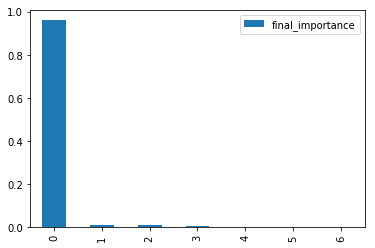

In [41]:
import matplotlib.pyplot as plt
fi = chef.feature_importance()
fi.plot.bar(); plt.show()
